# Energy Efficiency

### Problem Statement:

The effect of eight input variables (relative compactness, surface area, wall area, roof
area, overall height, orientation, glazing area, glazing area distribution) on two output
variables, namely heating load (HL) and cooling load (CL), of residential buildings is
investigated using a statistical machine learning framework. We have to use a number
of classical and non-parametric statistical analytic tools to carefully analyze the
strength of each input variable's correlation with each of the output variables in order
to discover the most strongly associated input variables. We need to estimate HL and
CL, we can compare a traditional linear regression approach to a sophisticated
state-of-the-art nonlinear non-parametric method, random forests.

### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or
outcomes, denoted by y1 and y2). <br>The aim is to use the eight features to predict each of the two
responses.<br>
Specifically:<br>
X1 Relative Compactness<br>
X2 Surface Area<br>
X3 Wall Area<br>
X4 Roof Area<br>
X5 Overall Height<br>
X6 Orientation<br>
X7 Glazing Area<br>
X8 Glazing Area Distribution<br>
y1 Heating Load - Target<br>
y2 Cooling Load - Target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
col = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

In [4]:
df.columns = col

In [5]:
df.head(2)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
df.isnull().sum().sum()

0

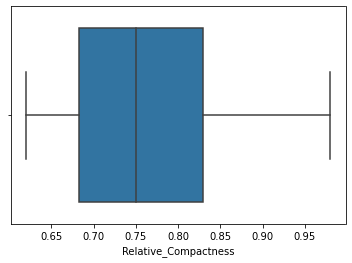

In [9]:
sns.boxplot(df['Relative_Compactness'])
plt.show()

In [10]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

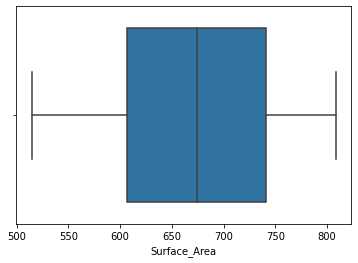

In [11]:
sns.boxplot(df['Surface_Area'])
plt.show()

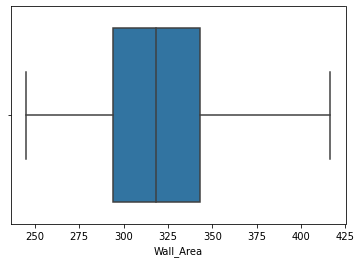

In [12]:
sns.boxplot(df['Wall_Area'])
plt.show()

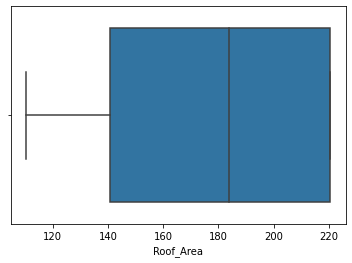

In [13]:
sns.boxplot(df['Roof_Area'])
plt.show()

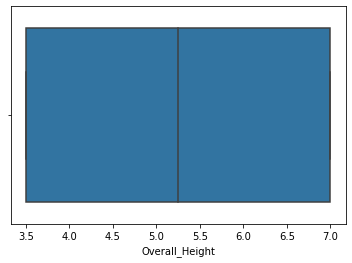

In [14]:
sns.boxplot(df['Overall_Height'])
plt.show()

In [15]:
df['Overall_Height'].value_counts()

3.5    384
7.0    384
Name: Overall_Height, dtype: int64

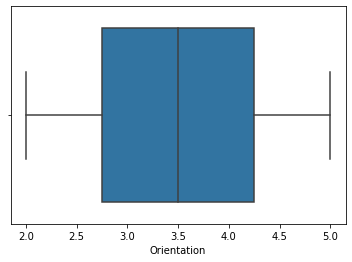

In [16]:
sns.boxplot(df['Orientation'])
plt.show()

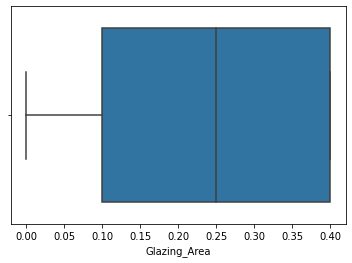

In [17]:
sns.boxplot(df['Glazing_Area'])
plt.show()

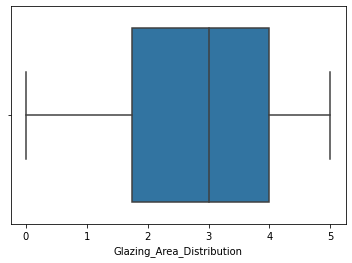

In [18]:
sns.boxplot(df['Glazing_Area_Distribution'])
plt.show()

### EDA

In [19]:
df.head(2)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


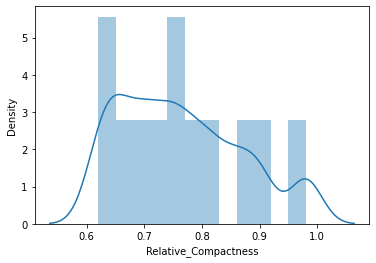

In [20]:
sns.distplot(df['Relative_Compactness'])
plt.show()

In [21]:
plt.rcParams['figure.figsize'] = (12, 8)

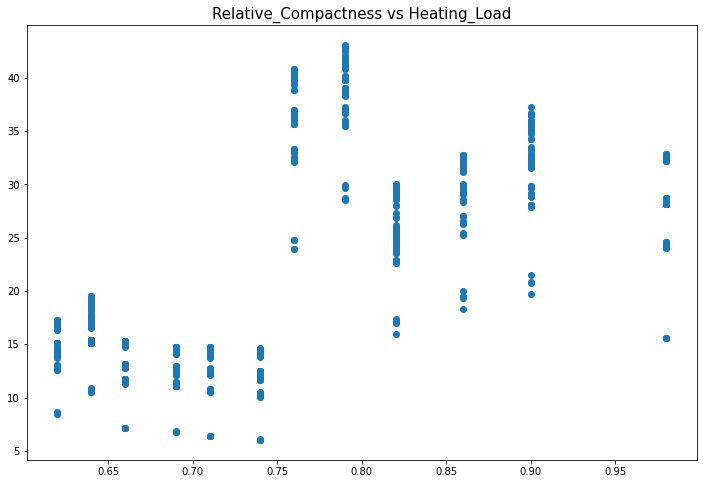

In [22]:
plt.scatter(df['Relative_Compactness'], df['Heating_Load'])
plt.title('Relative_Compactness vs Heating_Load', size = 15)
plt.show()

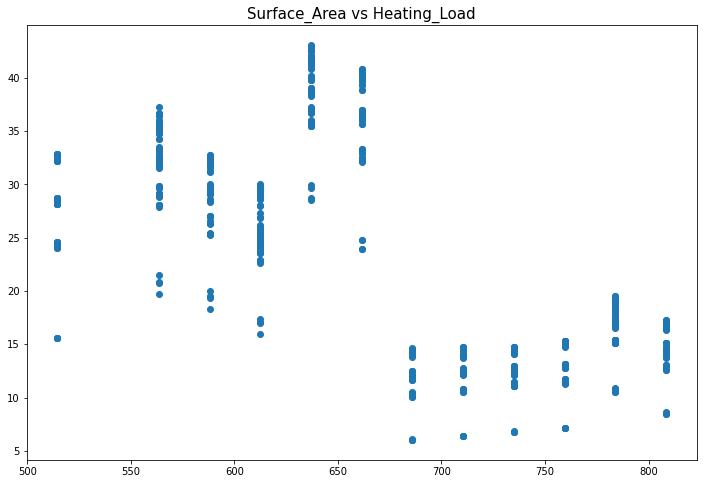

In [23]:
plt.scatter(df['Surface_Area'], df['Heating_Load'])
plt.title('Surface_Area vs Heating_Load', size = 15)
plt.show()

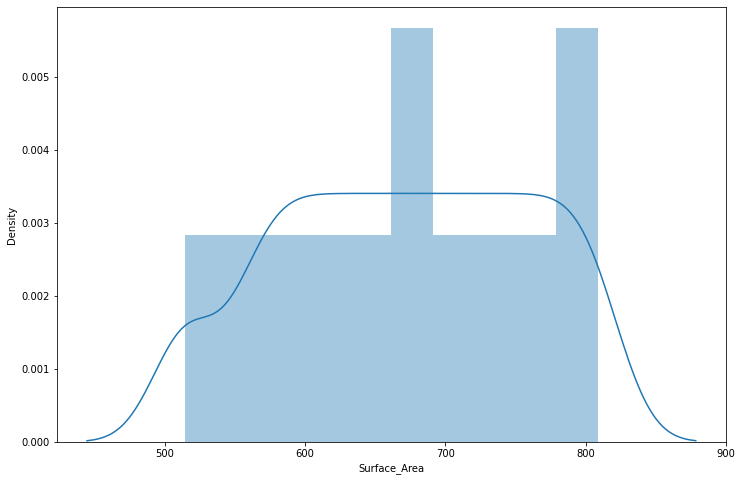

In [24]:
sns.distplot(df['Surface_Area'])
plt.show()

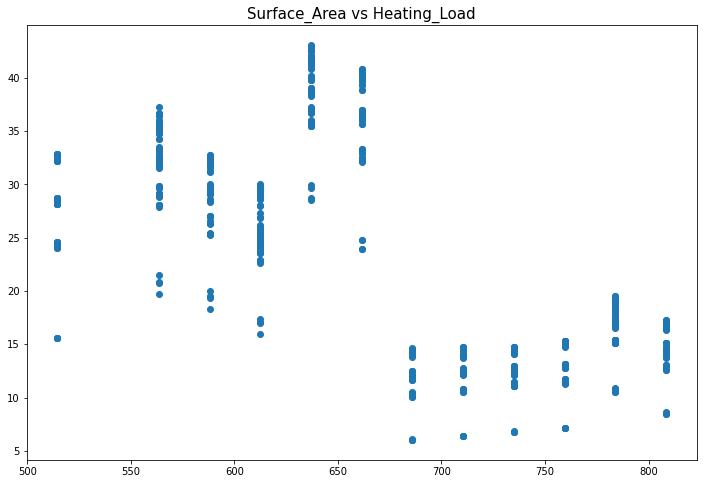

In [25]:
plt.scatter(df['Surface_Area'], df['Heating_Load'])
plt.title('Surface_Area vs Heating_Load', size = 15)
plt.show()

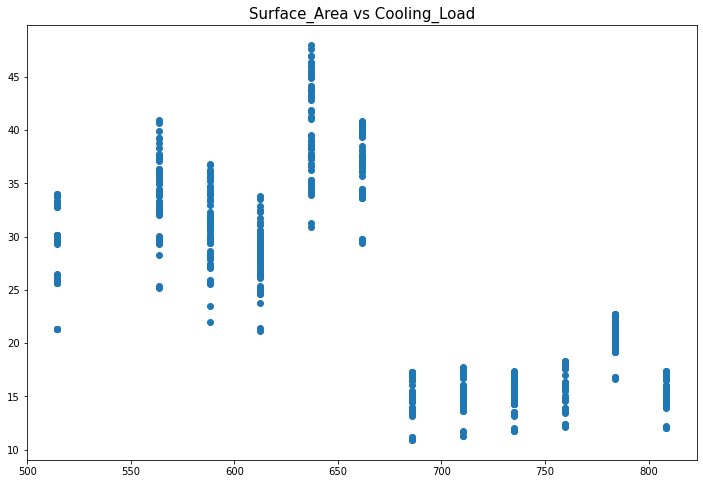

In [26]:
plt.scatter(df['Surface_Area'], df['Cooling_Load'])
plt.title('Surface_Area vs Cooling_Load', size = 15)
plt.show()

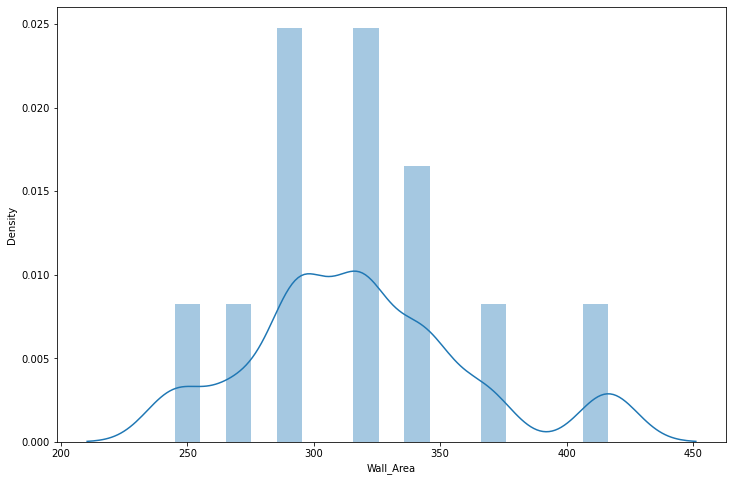

In [27]:
sns.distplot(df['Wall_Area'])
plt.show()

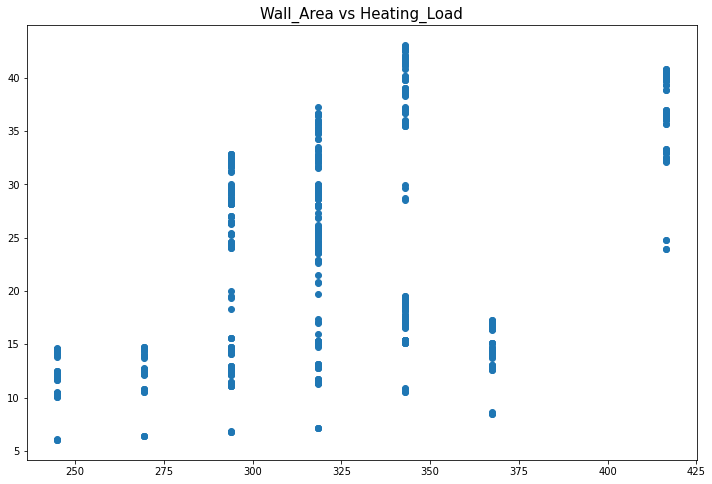

In [28]:
plt.scatter(df['Wall_Area'], df['Heating_Load'])
plt.title('Wall_Area vs Heating_Load', size = 15)
plt.show()

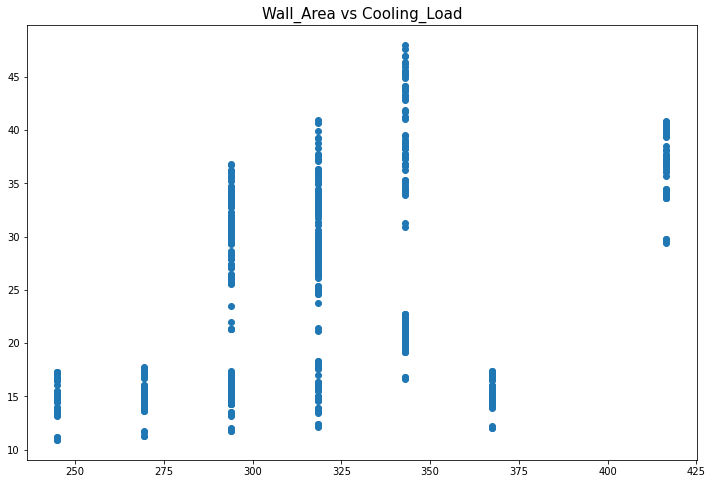

In [29]:
plt.scatter(df['Wall_Area'], df['Cooling_Load'])
plt.title('Wall_Area vs Cooling_Load', size = 15)
plt.show()

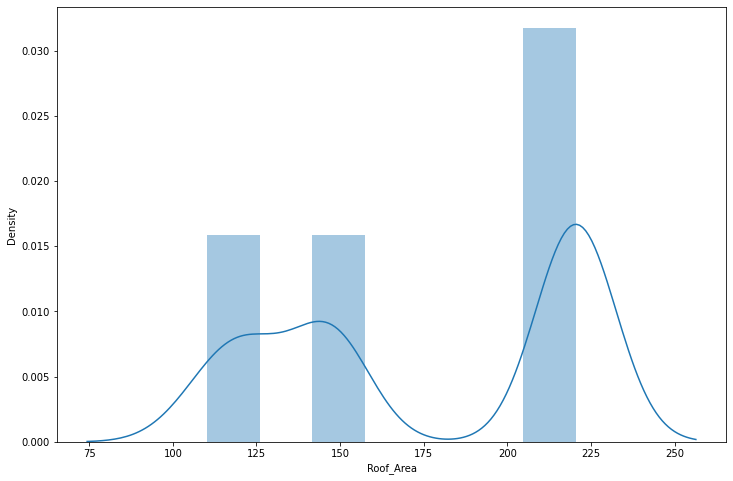

In [30]:
sns.distplot(df['Roof_Area'])
plt.show()

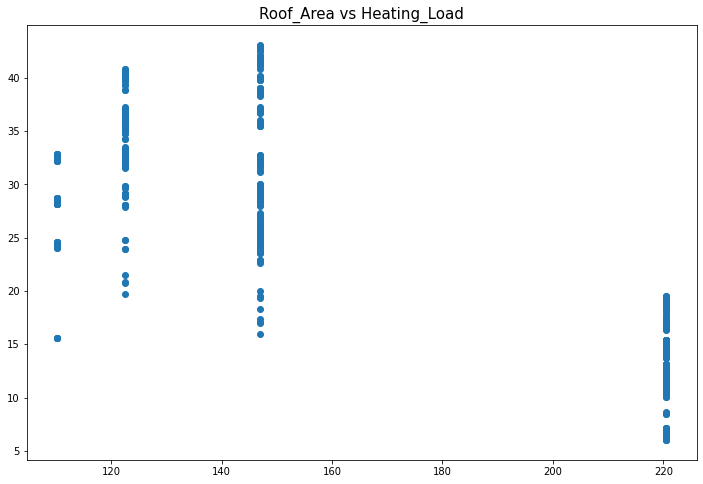

In [31]:
plt.scatter(df['Roof_Area'], df['Heating_Load'])
plt.title('Roof_Area vs Heating_Load', size = 15)
plt.show()

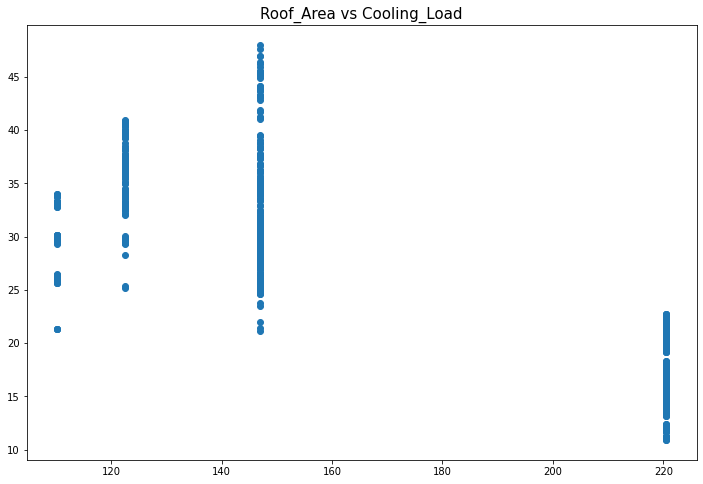

In [32]:
plt.scatter(df['Roof_Area'], df['Cooling_Load'])
plt.title('Roof_Area vs Cooling_Load', size = 15)
plt.show()

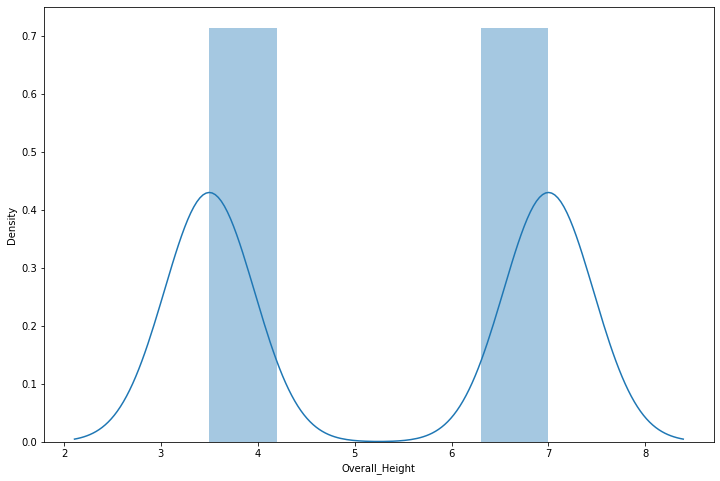

In [33]:
sns.distplot(df['Overall_Height'])
plt.show()

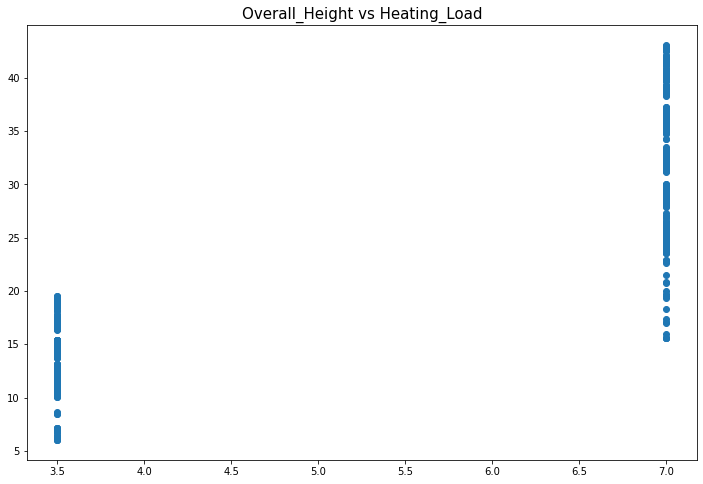

In [34]:
plt.scatter(df['Overall_Height'], df['Heating_Load'])
plt.title('Overall_Height vs Heating_Load', size = 15)
plt.show()

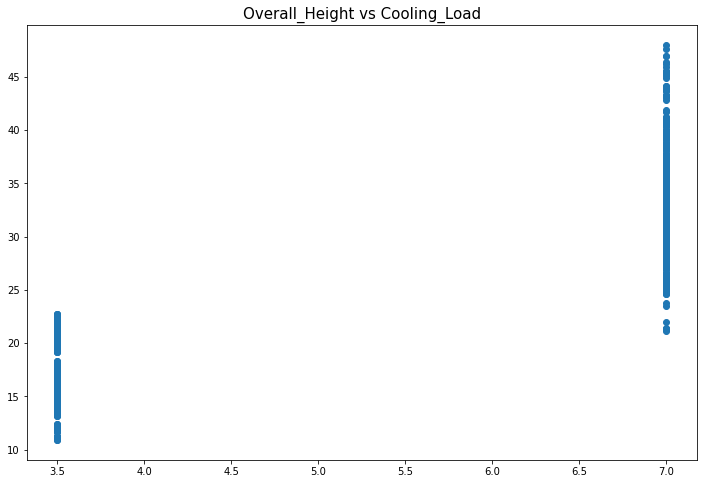

In [35]:
plt.scatter(df['Overall_Height'], df['Cooling_Load'])
plt.title('Overall_Height vs Cooling_Load', size = 15)
plt.show()

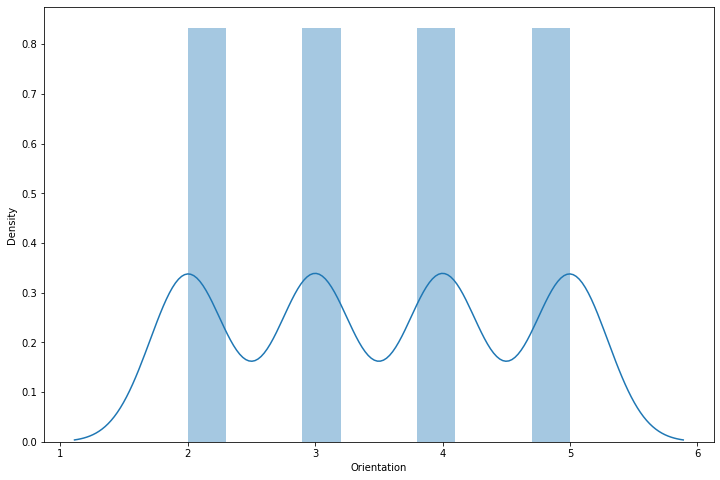

In [36]:
sns.distplot(df['Orientation'])
plt.show()

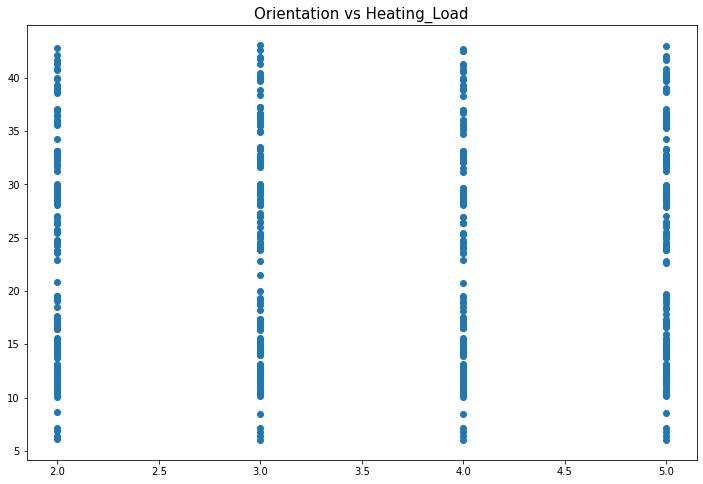

In [37]:
plt.scatter(df['Orientation'], df['Heating_Load'])
plt.title('Orientation vs Heating_Load', size = 15)
plt.show()

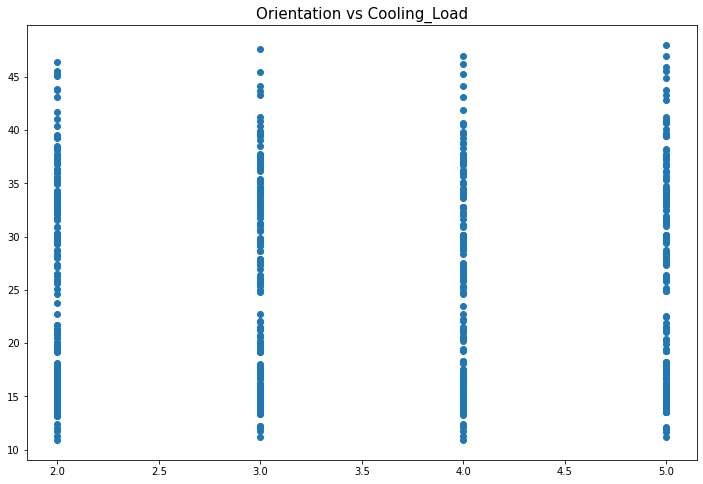

In [38]:
plt.scatter(df['Orientation'], df['Cooling_Load'])
plt.title('Orientation vs Cooling_Load', size = 15)
plt.show()

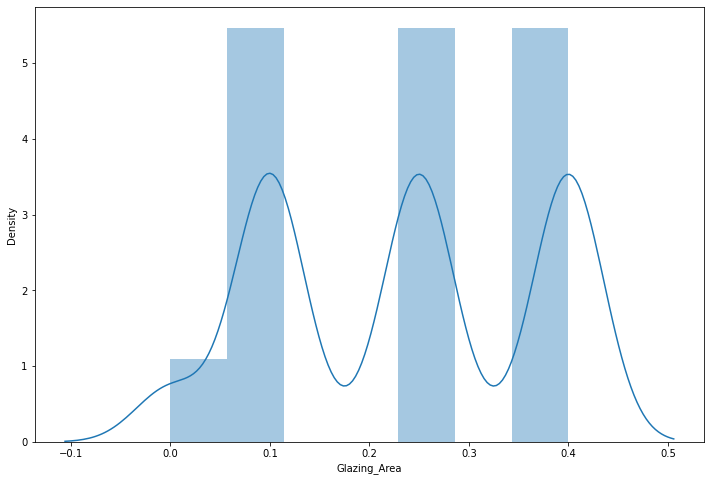

In [39]:
sns.distplot(df['Glazing_Area'])
plt.show()

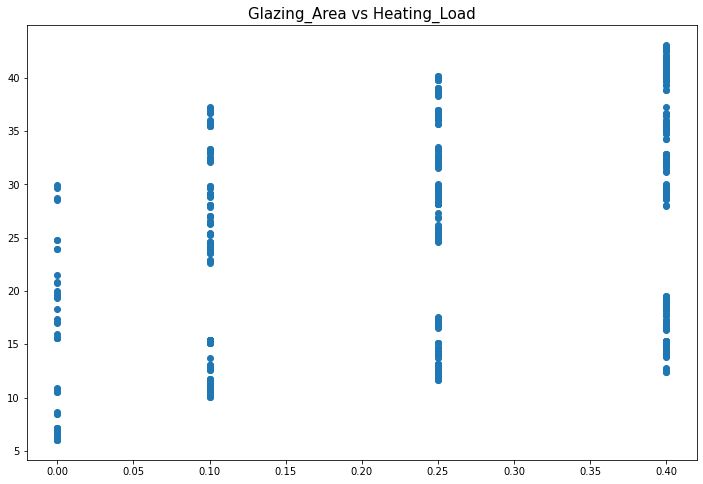

In [40]:
plt.scatter(df['Glazing_Area'], df['Heating_Load'])
plt.title('Glazing_Area vs Heating_Load', size = 15)
plt.show()

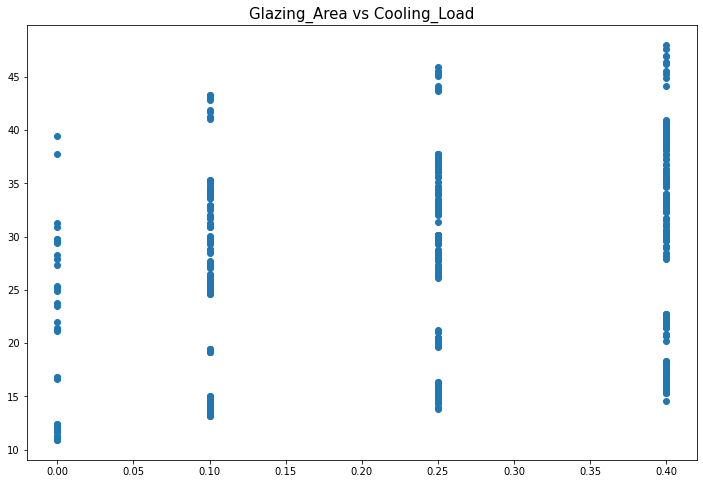

In [41]:
plt.scatter(df['Glazing_Area'], df['Cooling_Load'])
plt.title('Glazing_Area vs Cooling_Load', size = 15)
plt.show()

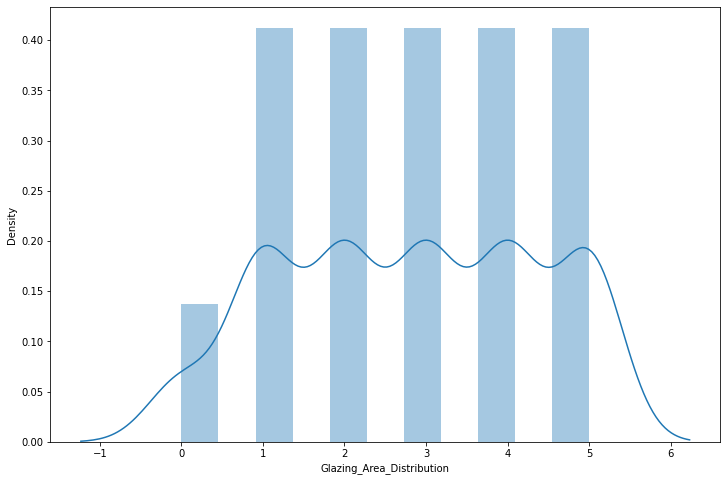

In [42]:
sns.distplot(df['Glazing_Area_Distribution'])
plt.show()

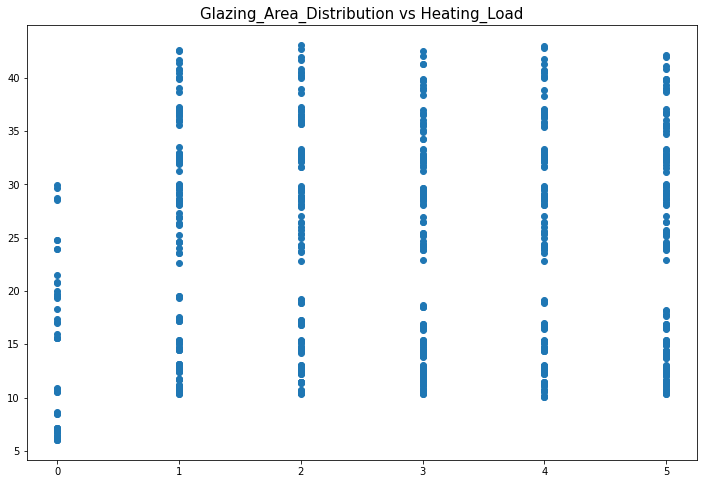

In [43]:
plt.scatter(df['Glazing_Area_Distribution'], df['Heating_Load'])
plt.title('Glazing_Area_Distribution vs Heating_Load', size = 15)
plt.show()

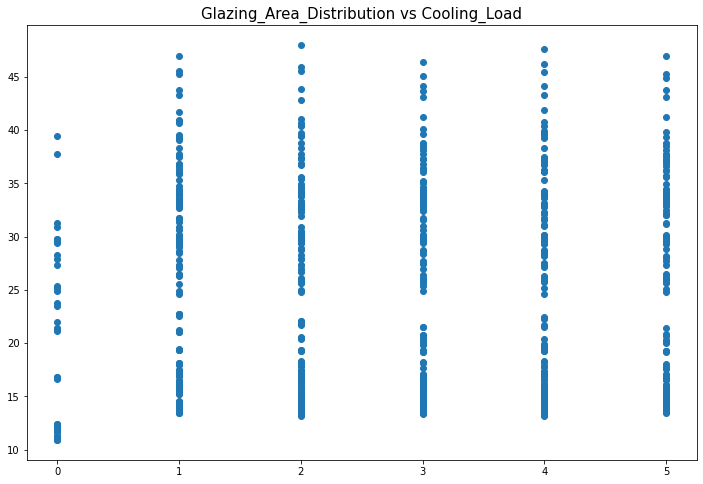

In [44]:
plt.scatter(df['Glazing_Area_Distribution'], df['Cooling_Load'])
plt.title('Glazing_Area_Distribution vs Cooling_Load', size = 15)
plt.show()

In [45]:
df.head(2)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


<Figure size 1008x1008 with 0 Axes>

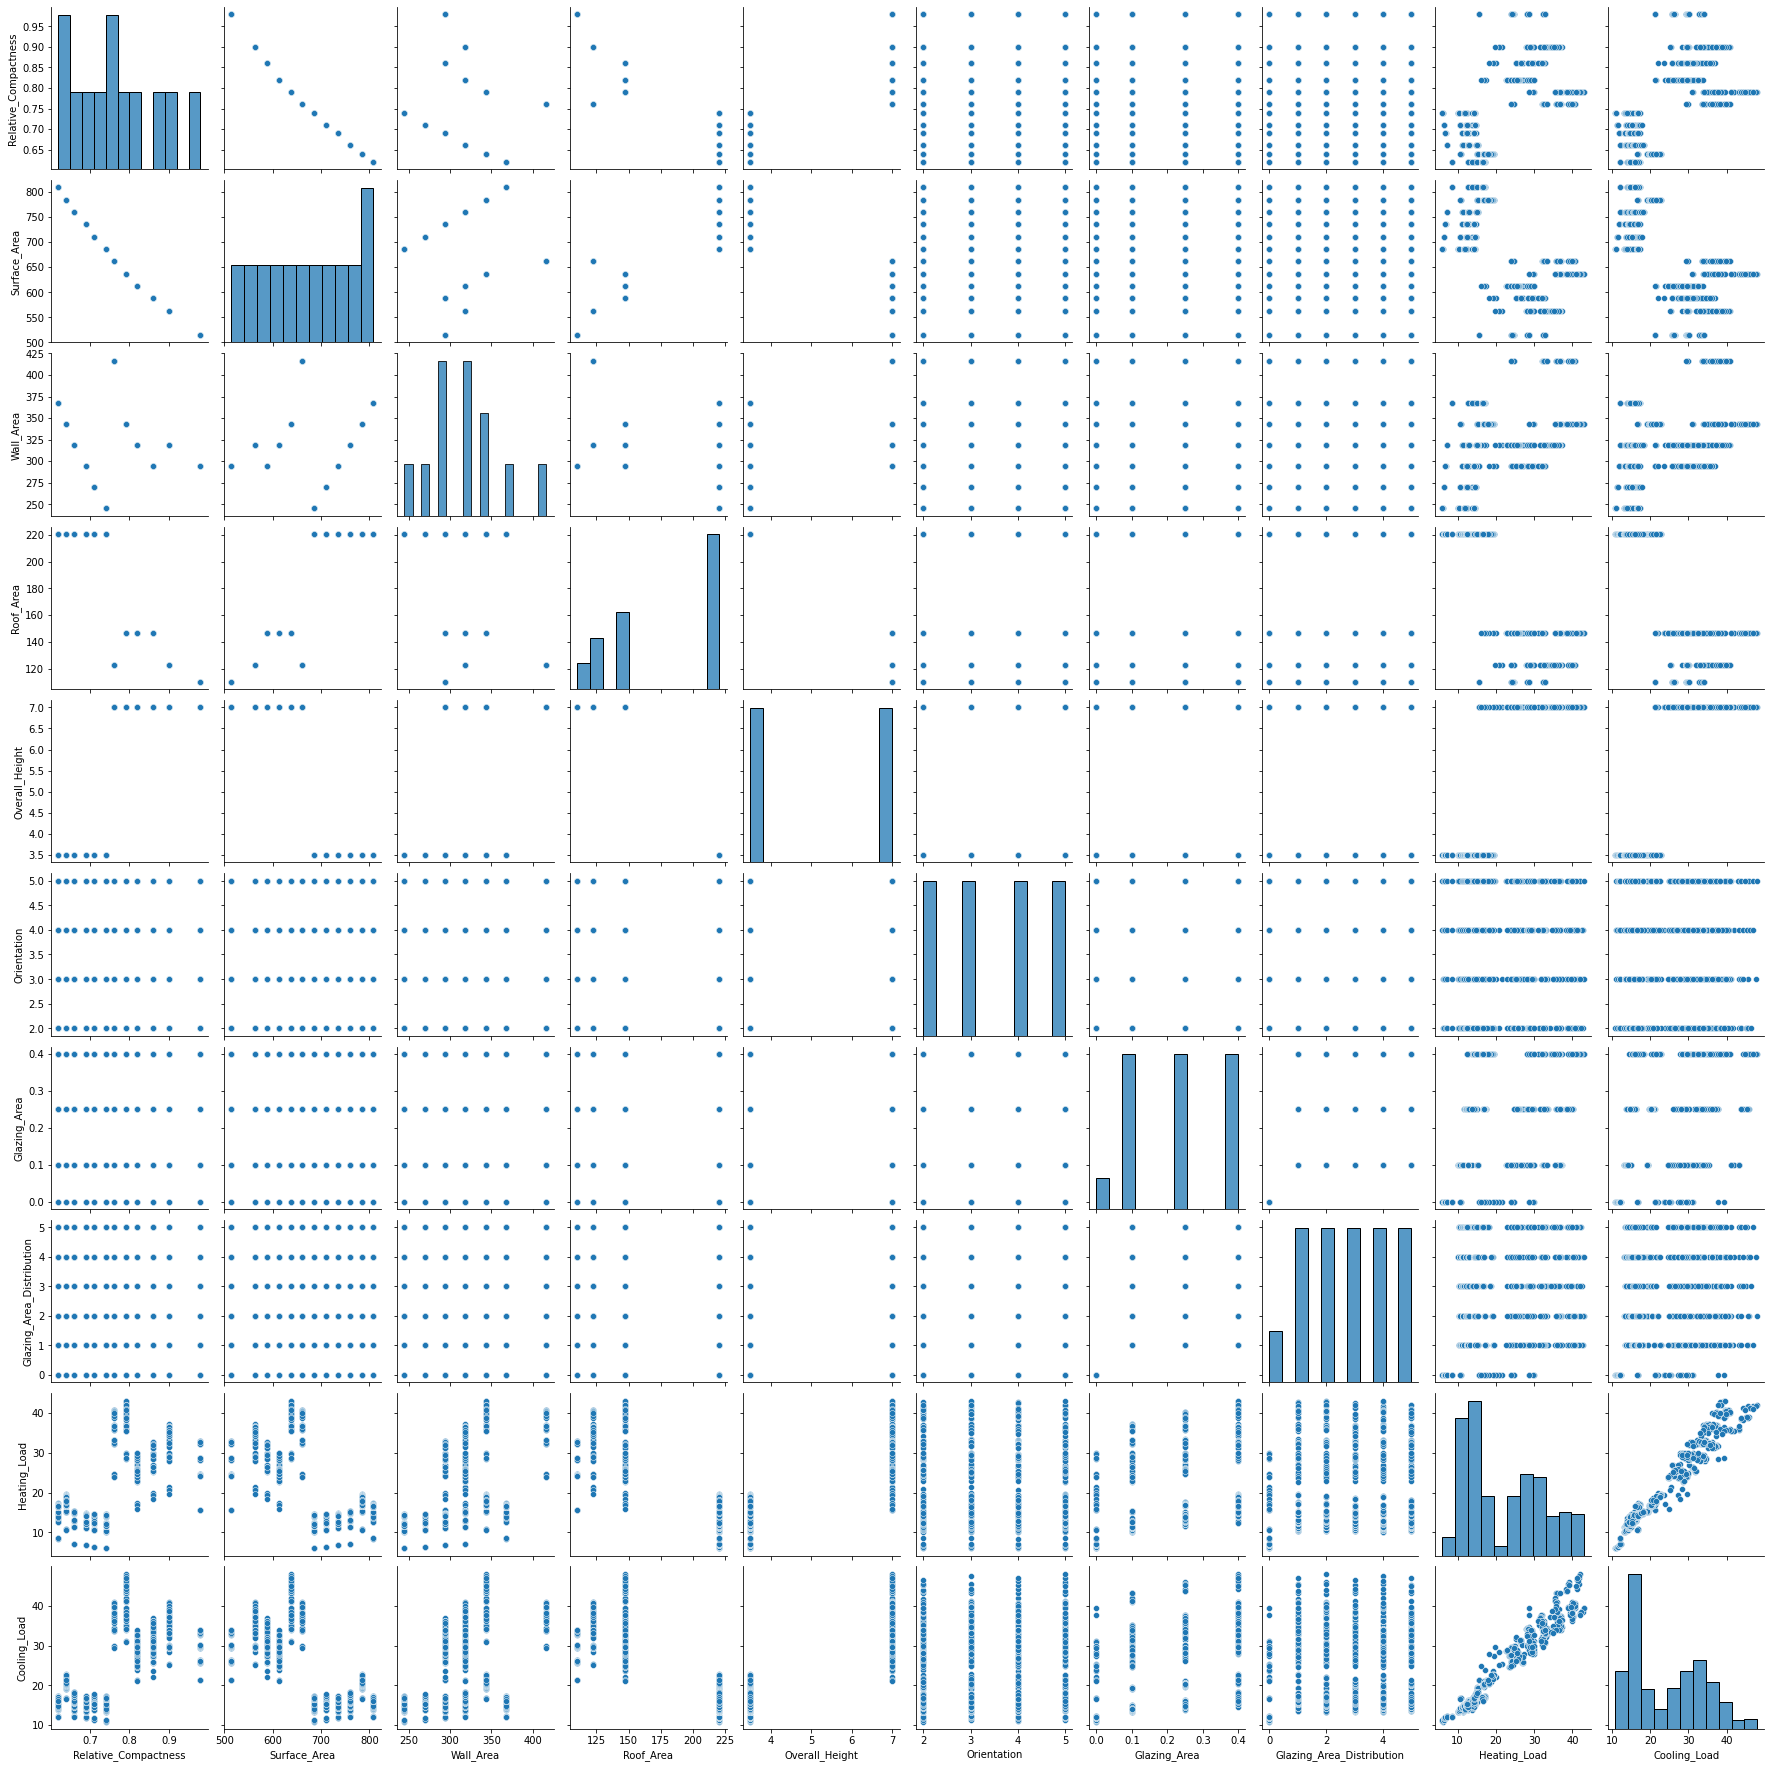

In [46]:
plt.figure(figsize = (14, 14))
sns.pairplot(df)
plt.show()

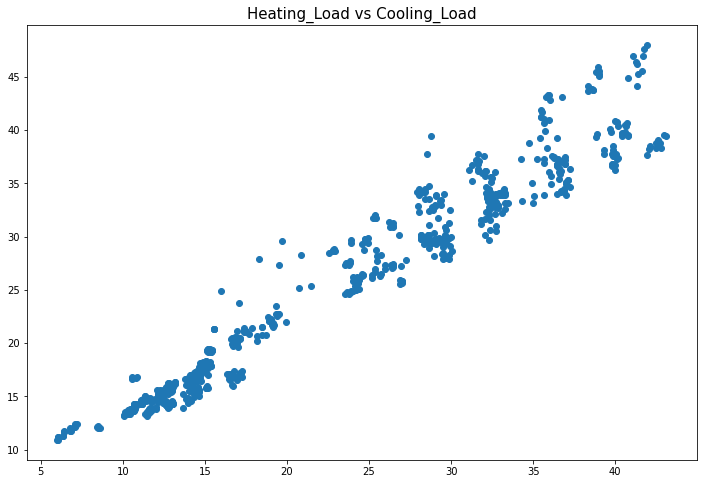

In [47]:
plt.scatter(df['Heating_Load'], df['Cooling_Load'])
plt.title('Heating_Load vs Cooling_Load', size = 15)
plt.show()

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(['Heating_Load', 'Cooling_Load'], axis = 1).copy()
y = df['Heating_Load'].values.reshape(df['Heating_Load'].shape[0], 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

### Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
x_sc = MinMaxScaler()
y_sc = MinMaxScaler()

In [53]:
scaled_x_train = x_sc.fit_transform(X_train)
scaled_y_train = y_sc.fit_transform(y_train)

### Model building

In [54]:
from sklearn.linear_model import LinearRegression

**To predict Y1**

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(scaled_x_train, scaled_y_train)

LinearRegression()

In [57]:
scaled_x_test = x_sc.transform(X_test)

In [58]:
predicted_lr = lr.predict(scaled_x_test)

In [59]:
pred = y_sc.inverse_transform(predicted_lr)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
np.sqrt(mean_squared_error(y_test, pred))

3.175573427582841

In [62]:
r2_score(y_test, pred)

0.9086787367780582

In [63]:
lr.intercept_

array([5.02997627e+11])

In [64]:
lr.coef_

array([[-5.49826122e-01,  3.01798576e+12, -1.76049169e+12,
        -2.26348932e+12,  3.85498047e-01, -7.68661499e-04,
         2.14192390e-01,  2.21576691e-02]])

### with Gradient Descent

In [65]:
def grad_desc(X, y_act, epoch, l_rate = 0.01):
    cols = X.shape[1]
    n = X.shape[0]
    w = np.ones(shape = (cols))
    b = 0
    
    epoch_ls = []
    cost_ls = []
    
    for i in range(epoch):
        pred = np.dot(w, X.T) + b
        
        w_grad = -(2/n) * (X.T.dot (y_act - pred))
        b_grad = -(2/n) * np.sum(y_act - pred)
        cost = np.mean(np.square(y_act - pred))
        
        w = w - l_rate * w_grad
        b = b - l_rate * b_grad
        
        if i%10 == 0:
            epoch_ls.append(i)
            cost_ls.append(cost)
            
    return w, b, cost, epoch_ls, cost_ls

w, b, cost, epoch_ls, cost_ls = grad_desc(scaled_x_train, scaled_y_train.reshape(scaled_y_train.shape[0], ), 500)
w, b, cost

(array([0.64712747, 0.37635376, 0.49367706, 0.33356876, 0.55888295,
        0.13240787, 0.24517724, 0.17701127]),
 -1.0291934728561989,
 0.012823004986930248)

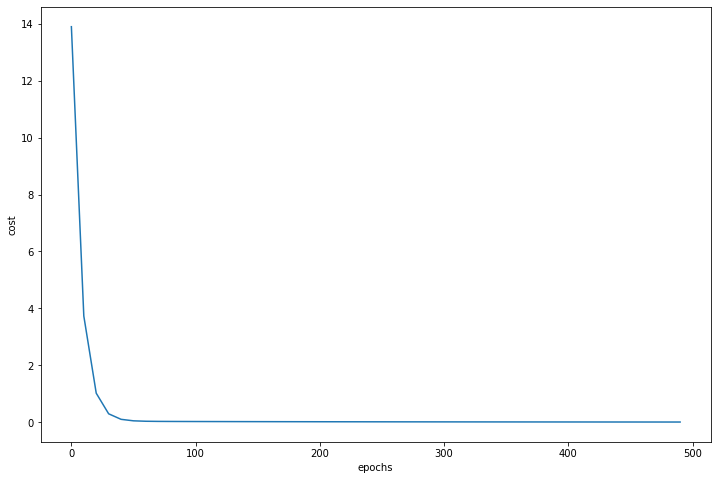

In [66]:
plt.plot(epoch_ls, cost_ls)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

In [67]:
def predict(x, w, b):
    pred = np.dot(x, w) + b
    return y_sc.inverse_transform([pred])[0]
pred_vals = predict(scaled_x_test, w, b)

In [68]:
np.sqrt(mean_squared_error(y_test, pred_vals))

4.543741068371721

In [69]:
r2_score(y_test, pred_vals)

0.8130373991520001

**To predict Y2**

In [70]:
X = df.drop(['Heating_Load', 'Cooling_Load'], axis = 1).copy()
y = df['Cooling_Load'].values.reshape(df['Cooling_Load'].shape[0], 1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [72]:
x_sc = MinMaxScaler()
y_sc = MinMaxScaler()

In [73]:
scaled_x_train = x_sc.fit_transform(X_train)
scaled_y_train = y_sc.fit_transform(y_train)

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(scaled_x_train, scaled_y_train)

LinearRegression()

In [76]:
scaled_x_test = x_sc.transform(X_test)

In [77]:
predicted_lr = lr.predict(scaled_x_test)

In [78]:
pred = y_sc.inverse_transform(predicted_lr)

In [79]:
np.sqrt(mean_squared_error(y_test, pred))

3.2693530149630097

In [80]:
r2_score(y_test, pred)

0.8863579564916803

---

**with Gradient Descent**

In [81]:
w, b, cost, epoch_ls, cost_ls = grad_desc(scaled_x_train, scaled_y_train.reshape(scaled_y_train.shape[0], ), 500)

In [82]:
w, b, cost

(array([0.638263  , 0.36772578, 0.46821314, 0.33809016, 0.53978986,
        0.13974697, 0.20778564, 0.15921774]),
 -1.0462029579574095,
 0.01467572922818252)

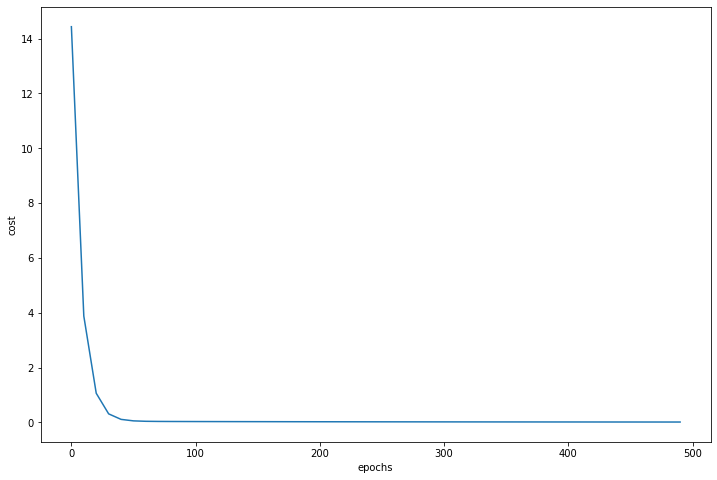

In [83]:
plt.plot(epoch_ls, cost_ls)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

In [84]:
pred_vals = predict(scaled_x_test, w, b)

In [85]:
np.sqrt(mean_squared_error(y_test, pred_vals))

4.8456620133669706

In [86]:
r2_score(y_test, pred_vals)

0.7503557094401188

---

### Using Random forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf = RandomForestRegressor()

In [89]:
X = df.drop(['Heating_Load', 'Cooling_Load'], axis = 1).copy()
y = df[['Heating_Load', 'Cooling_Load']].copy()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [91]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
pred = rf.predict(X_test)

In [93]:
r2_score(y_test, pred)

0.9774419231151823

In [94]:
df_new = pd.DataFrame({'Imp':rf.feature_importances_}, index = list(df.columns[:-2]))
df_new.sort_values(by = 'Imp', ascending = False)
df_new

,Imp
Relative_Compactness,0.315917
Surface_Area,0.210998
Wall_Area,0.042954
Roof_Area,0.074045
Overall_Height,0.270938
Orientation,0.006297
Glazing_Area,0.065640
Glazing_Area_Distribution,0.013211


---